In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f"C:/Users/Coord-Personal/Documents/ITZELT/TEC/UNII/SEXTO_SEMESTRE/analisis_numerico/Reto/datos/COLL_TEC_CONSOLIDADO.txt", sep = "," ,encoding = "latin1")

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19300\2048747068.py:1: DtypeWarning: Columns (45,46,47,51,52,53,57,58,59,87,88,89,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"C:/Users/Coord-Personal/Documents/ITZELT/TEC/UNII/SEXTO_SEMESTRE/analisis_numerico/Reto/datos/COLL_TEC_CONSOLIDADO.txt", sep = "," ,encoding = "latin1")


In [ ]:
df.head()

,ORG,Socio,Producto,Fecha_origina,Fecha_activacion,Mob,SaldoTotal,SaldoMes,Pago_minimo,Utilizacion,...,Fecha_pago_M5,Fecha_pago_M6,Canal_Pago.1,Canal_Pago.2,Canal_Pago.3,Canal_Pago.4,Canal_Pago.5,Canal_Pago.6,Score_pago,Variable_objetivo
0,310,CYA,PLCC,06/06/2008,09/06/2008,197,5625.09,4282.10,670.0,0.639215,...,09/07/2024,08/06/2024,NaN,C&A,C&A,C&A,C&A,C&A,10.0,0
1,310,CYA,PLCC,28/08/2007,20/06/2010,207,2639.12,2639.12,477.0,0.440588,...,03/07/2024,NaN,NaN,C&A,C&A,C&A,C&A,NaN,4.0,1
2,310,CYA,PLCC,15/06/2008,16/06/2008,197,1738.14,1738.14,305.0,0.347628,...,15/06/2024,NaN,NaN,C&A,NaN,NaN,C&A,NaN,2.0,0
3,310,CYA,PLCC,10/07/2008,11/07/2008,196,990.06,990.06,191.0,0.112507,...,NaN,NaN,NaN,NaN,C&A,C&A,NaN,NaN,4.0,0
4,310,CYA,PLCC,05/01/2007,02/05/2007,214,1356.34,1356.34,165.0,0.523683,...,27/06/2024,NaN,NaN,C&A,NaN,C&A,C&A,NaN,9.0,0


In [5]:
df.groupby(["ORG", "Producto"])[["SaldoTotal", "SaldoMes", "Pago_minimo", "Ciclo_Atraso", "Limite_credito","Corte", "Fecha_limite_pago", "Pago"]].apply(lambda x: x.isnull().sum())

,,SaldoTotal,SaldoMes,Pago_minimo,Ciclo_Atraso,Limite_credito,Corte,Fecha_limite_pago,Pago
ORG,Producto,,,,,,,,
310,PLCC,0,0,0,0,0,0,0,6443
311,PLCC,0,0,0,0,0,0,0,135170
320,BK,0,0,0,0,0,0,0,110161
340,PP,0,0,0,0,0,0,0,658
341,PP,0,0,0,0,0,0,0,51014
350,BK,0,0,0,0,0,0,0,334
352,BK,0,0,0,0,0,0,0,238624
353,BK,0,0,0,0,0,0,0,5903
354,BK,0,0,0,0,0,0,0,118535


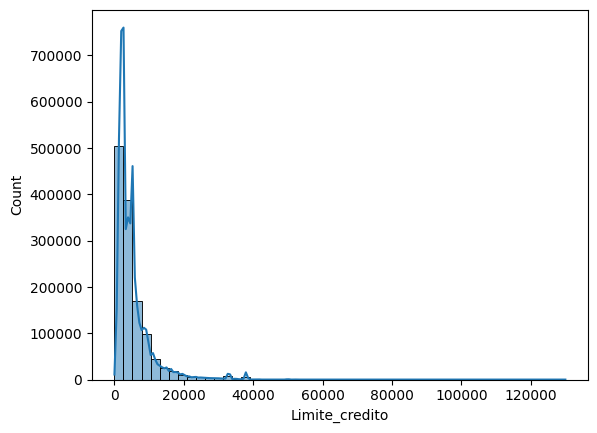

In [6]:
sns.histplot(df["Limite_credito"], bins=50, kde=True)
plt.show()